# Linear Regression using Gradient Descent  
![Gradeint descent](animation1.gif)
## Linear Regression   
In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. 
Let **X** be the independent variable and **Y** be the dependent variable. We will define a linear relationship between these two variables as follows:  

\\[ Y = mX + c \\]  
![mxplusc](http://www.nabla.hr/SlopeInterceptLineEqu.gif)

This is the equation for a line that you studied in high school. **m** is the slope of the line and **c** is the y intercept. Today we will use this equation to train our model with a given dataset and predict the value of **Y** for any given value of **X**.  
  
Our challenege today is to determine the value of **m** and **c**, such that the line corresponding to those values is the best fitting line or gives the minimum error.  
## Loss function  
The loss is the error in our predicted of **m** and **c**. Our goal is to minimize this error to obtain the most accurance value of **m** and **c**.  
We will use the Mean Squared Error function to calculate the loss. There are three steps in this function:
1. Find the difference between the actual y and predicted y value(y = mx + c), for a given x.  
2. Square this difference.
3. Find the mean of the squares for every value in X.  
\\[ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar y_i)^2\\]  

Here $y_i$ is the actual value and $\bar y_i$ is the predicted value. Lets substitue the value of $\bar y_i$
\\[ E = \frac{1}{n} \sum_{i=0}^n (y_i - (mx_i + c))^2\\]
So we square the error and find the mean. hence the name Mean Squared Error.  
Now that we have defined the loss function, lets get into the interesting part - minimizing it and finding **m** and **c**

## The Gradient Descent Algorithm  
Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function.  
**Understanding Gradient Descent**  
![valley](valley-illustration.jpg)  

Imagine a valley and a person with no sense of direction who wants to get to the bottom of the valley. He goes down the slope and takes large steps when the slope is steep and small steps when the slope is less steep. He decides his next position based on his current position and stops when he gets to the bottom of the valley which was his goal.   
Let's try applying gradient descent to **m** and **c** and approach it step by step: 
1. Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of **m** changes with each step. L could be a small value like 0.0001 for good accuracy. 
2. Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value **D**.  
\\[ D_m = \frac{1}{n} \sum_{i=0}^n 2(y_i - (mx_i + c))(-x_i) \\]
\\[ D_m = \frac{-2}{n} \sum_{i=0}^n x_i(y_i - \bar y_i) \\]  
$D_m$ is the value of the partial derivative with respect to **m**. Similarly lets find the partial derivative with respect to **c**, $D_c$ :  
\\[ D_c = \frac{-2}{n} \sum_{i=0}^n (y_i - \bar y_i) \\]
3. Now we update the current value of **m** and **c** using the following equation: 
\\[ m = m - L \times D_m\\]  
\\[ c = c - L \times D_c\\]  
4. We repeat this process untill our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of **m** and **c** that we are left with now will be the optimum values.  
  
Now going back to our analogy, **m** can be considered the current position of the person. **D** is equivalent to the steepness of the slope and **L** can be the speed with which he moves. Now the new value of **m** that we calculate using the above equation will be his next positon, and $L \times D$ will be the size of the steps he will take. When the slope is more steep (**D** is more) he takes longer steps and when it is less steep (**D** is less), he takes smaller steps. Finally he arrives at the bottom of the valley which corresponds to our loss = 0.  
We repeat the same process above to find the value of **c** also. Now with the optimum value of **m** and **c** our model is ready to make predictions !  

## Implementing the Model  
Now let's convert everything above into code and see our model in action !

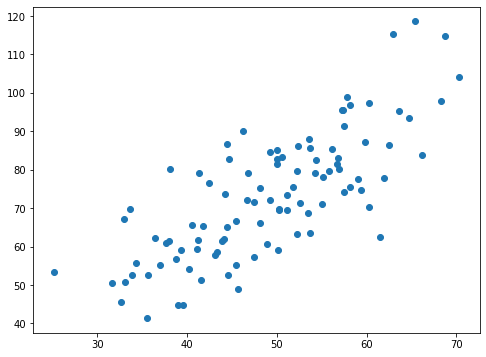

In [5]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)

# Preprocessing Input data
data = pd.read_csv('data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [9]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X
#print(n)

print(float(len(X)))

print(float(len(Y)))
# Performing Gradient Descent 
for i in range(epochs):
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    print(m,c)
print("===================")
print (m, c)

99.0
99.0
0.7424335285415494 0.014629895049539552
1.1126970531564835 0.02196251949501772
1.2973530613136097 0.02565587059950957
1.3894434413943608 0.027534253868739502
1.4353697670003447 0.028507481513835913
1.4582732927875135 0.02902929237235795
1.4696949563897819 0.029325973726661497
1.4753904198682661 0.02951037889658117
1.478230129872329 0.029638789753839184
1.4796456270100444 0.02973927502595998
1.4803508449519853 0.029825833065180055
1.4807018345730651 0.02990544508805775
1.4808761645057094 0.029981592746134954
1.4809623912496854 0.030056012398306246
1.4810046794389382 0.030129569996312628
1.4810250547282364 0.03020269740503053
1.4810345016865596 0.030275610002827507
1.4810384985054497 0.03034841520256384
1.4810397772522843 0.03042116657286344
1.4810397004555735 0.030493890829312927
1.4810389476314794 0.030566601295432105
1.4810378576662797 0.030639304615889085
1.48103659956833 0.030712004104494938
1.4810352576249737 0.03078470141390563
1.4810338738717446 0.0308573973683308
1.481

1.480541370052686 0.05597782703867394
1.4805399483285047 0.056050336770269854
1.4805385266147866 0.056122845968235455
1.4805371049115317 0.05619535463257467
1.4805356832187395 0.05626786276329142
1.4805342615364103 0.056340370360389636
1.4805328398645439 0.05641287742387325
1.4805314182031402 0.056485383953746186
1.480529996552199 0.05655788995001237
1.4805285749117203 0.05663039541267572
1.480527153281704 0.05670290034174018
1.4805257316621503 0.05677540473720967
1.4805243100530587 0.056847908599088115
1.4805228884544295 0.05692041192737944
1.4805214668662625 0.056992914722087576
1.4805200452885574 0.057065416983216447
1.4805186237213144 0.05713791871076998
1.4805172021645334 0.05721041990475211
1.480515780618214 0.057282920565166755
1.4805143590823566 0.05735542069201784
1.4805129375569608 0.057427920285309304
1.4805115160420268 0.05750041934504506
1.4805100945375542 0.05757291787122904
1.480508673043543 0.05764541586386517
1.4805072515599933 0.05771791332295738
1.4805058300869047 0.

1.479999032115007 0.08363774787117369
1.479997614382124 0.08371005404151045
1.479996196659675 0.08378235967971501
1.4799947789476595 0.08385466478579125
1.4799933612460776 0.0839269693597431
1.4799919435549291 0.08399927340157448
1.4799905258742139 0.08407157691128932
1.479989108203932 0.0841438798888915
1.4799876905440836 0.08421618233438498
1.4799862728946682 0.08428848424777365
1.4799848552556858 0.08436078562906142
1.4799834376271366 0.08443308647825222
1.4799820200090203 0.08450538679534995
1.4799806024013369 0.08457768658035855
1.4799791848040862 0.08464998583328191
1.4799777672172683 0.08472228455412396
1.4799763496408829 0.08479458274288862
1.47997493207493 0.08486688039957979
1.4799735145194097 0.08493917752420141
1.4799720969743217 0.08501147411675737
1.4799706794396663 0.0850837701772516
1.479969261915443 0.08515606570568802
1.4799678444016517 0.08522836070207053
1.4799664268982926 0.08530065516640306
1.4799650094053656 0.08537294909868952
1.4799635919228706 0.08544524249893

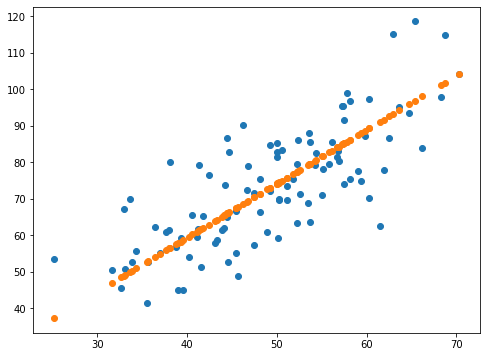

In [11]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y)
plt.scatter(X, Y_pred) # predicted
#plt.plot([min(X), max(X)], [Y_pred[np.argmin(X)], Y_pred[np.argmax(X)]], color='red') # predicted
plt.show()